<a href="https://colab.research.google.com/github/shaem/Fake-News-Classification/blob/main/FakeNewsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset URL: https://www.kaggle.com/hassanamin/textdb3?select=fake_or_real_news.csv

# **Dataset and Data Visualization**

Import the required library and mount to google drive to read dataset file.

In [ ]:
#Import required library
import numpy as np
import pandas as pd

In [ ]:
#mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read file
fail='/content/drive/MyDrive/Colab Notebooks/fake_or_real_news.csv'
news_csv = pd.read_csv(fail)

Copy the dataset to another attribute without affecting the original data. Then, get some view of the dataset.

In [ ]:
news = news_csv.copy()

#Display first 10 records in dataset
news.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [ ]:
#Get dataset info
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
#Get dataset decsription
news.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [ ]:
#Get the number of labels/categories of the data
news['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

Visualize the data based on label

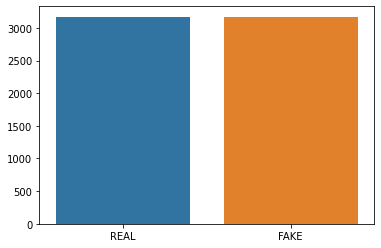

In [ ]:
#Import required library
import seaborn as sns
import matplotlib.pyplot as plt

#Define bar chart
sns.barplot(x=news['label'].value_counts().index,y=news['label'].value_counts().values,data=news)
plt.show()

# **Data Preprocessing**

Convert the data into a clean set of data.

Check the dataset wheater have a null value or not

In [ ]:
#To get null info
news.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

There is no null value. So, all the data will be processed to the next step.

In [ ]:
#To get duplicate info
news.duplicated(subset = ['title','text']).sum()

29

There are 29 duplicates rows. Then, drop it to get the clean data.

In [ ]:
#Drop duplicate rows
news = news.drop_duplicates(subset = ['title','text'])

In [ ]:
#Recheck dataset info
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6306 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6306 non-null   int64 
 1   title       6306 non-null   object
 2   text        6306 non-null   object
 3   label       6306 non-null   object
dtypes: int64(1), object(3)
memory usage: 246.3+ KB


Combine the 2 attributes (title and text) to make other preprocessing activities easier for text classification.

In [ ]:
#Combine title and text into 1 attribute
news['article'] = news['title']+" "+news['text']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Check wheater it combine or not
news.head(10)

,Unnamed: 0,title,text,label,article
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,"Tehran, USA \nI’m not an immigrant, but my g..."
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,Girl Horrified At What She Watches Boyfriend D...
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,‘Britain’s Schindler’ Dies at 106 A Czech stoc...
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,Fact check: Trump and Clinton at the 'commande...
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,Iran reportedly makes new push for uranium con...


In [ ]:
#Creating new dataframe with article and label attributes 
df_news = news[['article',  'label']]

df_news.head(10)

,article,label
0,You Can Smell Hillary’s Fear Daniel Greenfield...,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,Kerry to go to Paris in gesture of sympathy U....,REAL
3,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,The Battle of New York: Why This Primary Matte...,REAL
5,"Tehran, USA \nI’m not an immigrant, but my g...",FAKE
6,Girl Horrified At What She Watches Boyfriend D...,FAKE
7,‘Britain’s Schindler’ Dies at 106 A Czech stoc...,REAL
8,Fact check: Trump and Clinton at the 'commande...,REAL
9,Iran reportedly makes new push for uranium con...,REAL


In [ ]:
#Get the new number of labels/categories of the data
df_news['label'].value_counts()

REAL    3154
FAKE    3152
Name: label, dtype: int64

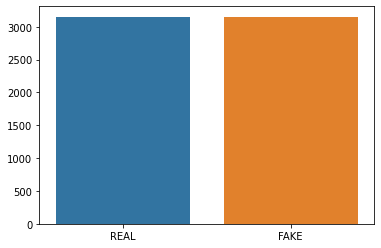

In [ ]:
#Visualise the data based on label
sns.barplot(x=df_news['label'].value_counts().index,y=df_news['label'].value_counts().values,data=df_news)
plt.show()

Do the preprocessing step for text data.

1) Lower Case

In [ ]:
#Converting to lower case
df_news['article_lowercase'] = df_news['article'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Checking the data by displaying it and compare the result
df_news

,article,label,article_lowercase
0,You Can Smell Hillary’s Fear Daniel Greenfield...,FAKE,you can smell hillary’s fear daniel greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,watch the exact moment paul ryan committed pol...
2,Kerry to go to Paris in gesture of sympathy U....,REAL,kerry to go to paris in gesture of sympathy u....
3,Bernie supporters on Twitter erupt in anger ag...,FAKE,bernie supporters on twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matte...,REAL,the battle of new york: why this primary matte...
...,...,...,...
6330,State Department says it can't find emails fro...,REAL,state department says it can't find emails fro...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,the ‘p’ in pbs should stand for ‘plutocratic’ ...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,FAKE,anti-trump protesters are tools of the oligarc...
6333,"In Ethiopia, Obama seeks progress on peace, se...",REAL,"in ethiopia, obama seeks progress on peace, se..."


2) Remove punctuation

In [ ]:
#Remove punctuation
#Import required library
import string

#Define the function
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [ ]:
#Apply the function
df_news['article_punc'] = df_news['article_lowercase'].apply(punctuation_removal)

#Check the data by displaying it and compare the result
df_news

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,article,label,article_lowercase,article_punc
0,You Can Smell Hillary’s Fear Daniel Greenfield...,FAKE,you can smell hillary’s fear daniel greenfield...,you can smell hillary’s fear daniel greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,watch the exact moment paul ryan committed pol...,watch the exact moment paul ryan committed pol...
2,Kerry to go to Paris in gesture of sympathy U....,REAL,kerry to go to paris in gesture of sympathy u....,kerry to go to paris in gesture of sympathy us...
3,Bernie supporters on Twitter erupt in anger ag...,FAKE,bernie supporters on twitter erupt in anger ag...,bernie supporters on twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matte...,REAL,the battle of new york: why this primary matte...,the battle of new york why this primary matter...
...,...,...,...,...
6330,State Department says it can't find emails fro...,REAL,state department says it can't find emails fro...,state department says it cant find emails from...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,the ‘p’ in pbs should stand for ‘plutocratic’ ...,the ‘p’ in pbs should stand for ‘plutocratic’ ...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,FAKE,anti-trump protesters are tools of the oligarc...,antitrump protesters are tools of the oligarch...
6333,"In Ethiopia, Obama seeks progress on peace, se...",REAL,"in ethiopia, obama seeks progress on peace, se...",in ethiopia obama seeks progress on peace secu...


3) Remove stopwords

In [ ]:
#Removing stopwords
#Import required library
from gensim.parsing.preprocessing import remove_stopwords

#Define the function
def stopword_removal(row):
    text = row['article_punc']
    text = remove_stopwords(text)
    return text

In [ ]:
#Apply the function
df_news['article_clean'] = df_news.apply(stopword_removal, axis=1)

In [ ]:
#Check the data by displaying it and compare the result
df_news

,article,label,article_lowercase,article_punc,article_clean
0,You Can Smell Hillary’s Fear Daniel Greenfield...,FAKE,you can smell hillary’s fear daniel greenfield...,you can smell hillary’s fear daniel greenfield...,smell hillary’s fear daniel greenfield shillma...
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,watch the exact moment paul ryan committed pol...,watch the exact moment paul ryan committed pol...,watch exact moment paul ryan committed politic...
2,Kerry to go to Paris in gesture of sympathy U....,REAL,kerry to go to paris in gesture of sympathy u....,kerry to go to paris in gesture of sympathy us...,kerry paris gesture sympathy secretary state j...
3,Bernie supporters on Twitter erupt in anger ag...,FAKE,bernie supporters on twitter erupt in anger ag...,bernie supporters on twitter erupt in anger ag...,bernie supporters twitter erupt anger dnc trie...
4,The Battle of New York: Why This Primary Matte...,REAL,the battle of new york: why this primary matte...,the battle of new york why this primary matter...,battle new york primary matters primary day ne...
...,...,...,...,...,...
6330,State Department says it can't find emails fro...,REAL,state department says it can't find emails fro...,state department says it cant find emails from...,state department says emails clinton specialis...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,the ‘p’ in pbs should stand for ‘plutocratic’ ...,the ‘p’ in pbs should stand for ‘plutocratic’ ...,‘p’ pbs stand ‘plutocratic’ ‘pentagon’ ‘p’ pbs...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,FAKE,anti-trump protesters are tools of the oligarc...,antitrump protesters are tools of the oligarch...,antitrump protesters tools oligarchy informati...
6333,"In Ethiopia, Obama seeks progress on peace, se...",REAL,"in ethiopia, obama seeks progress on peace, se...",in ethiopia obama seeks progress on peace secu...,ethiopia obama seeks progress peace security e...


Download the clean data to csv file for futher reference.

In [ ]:
#To download the dataset to csv file
df_news.to_csv (r'news_clean'+'.csv')

# **Feature Extraction**

To convert the text to numbers, then feed it into the classification algorithms. Using CountVectorizer and tfidf functions

In [ ]:
#CountVectorizer

#Import required library
from sklearn.feature_extraction.text import CountVectorizer

#Creating the bag of words
bow_article = CountVectorizer().fit(df_news['article_clean'])

article_vect = bow_article.transform(df_news['article_clean'])

In [ ]:
#TF-IDF

#Import required library
from sklearn.feature_extraction.text import TfidfTransformer

#Define the function then display the result
tfidf_transformer = TfidfTransformer().fit(article_vect)
news_tfidf = tfidf_transformer.transform(article_vect)

print(news_tfidf.shape)

(6306, 84465)


# **Model Implementation**

Use three (3) machine learning models to do classification.

1.   Logistic Regression (LR)
2.   Support Vector Machine (SVM)
3.   K-Nearest Neighbours (KNN)

In [ ]:
#Import required library
from sklearn.model_selection import train_test_split

#Define the data
X = news_tfidf
y = df_news['label']

#Split the dataset to training set and test set
X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #change the test_size value
print ("Total test data: ", len(Y_test))
print ("Total training data: ", len(Y_train))

Total test data:  1262
Total training data:  5044


In [ ]:
#Import required library
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Define the function of the model
modellr=LogisticRegression().fit(X_train,Y_train)
modelsvm=SGDClassifier().fit(X_train,Y_train)
modelknn=KNeighborsClassifier(n_neighbors=2).fit(X_train,Y_train) #change the n_neighbors value

# **Performance Evaluation**

Evaluate the model performance to training set and test set by using 5 evaluation metrics.

1. Accuracy
2. Precision 
3. Recall
4. F1-score
5. Confusion matrix



**Logistic Regression**


Logictic Regression Training Data = 95.94%

Logictic Regression Test Data = 91.60%

Logictic Regression Classification Report:
              precision    recall  f1-score   support

        FAKE       0.89      0.95      0.92       631
        REAL       0.95      0.88      0.91       631

    accuracy                           0.92      1262
   macro avg       0.92      0.92      0.92      1262
weighted avg       0.92      0.92      0.92      1262



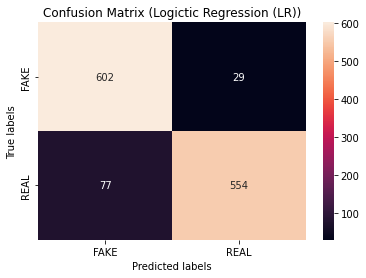

In [ ]:
#Import required library
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt 

#Evaluate to training data set
trainlr = modellr.score(X_train,Y_train)
print('\nLogictic Regression Training Data = {:.2f}%'.format(np.mean(trainlr*100)))

#Evaluate to test data set
#Model accuracy
acc1 = modellr.score(X_test,Y_test)
print('\nLogictic Regression Test Data = {:.2f}%'.format(np.mean(acc1*100)))

#F1-score
y_pred1 = modellr.predict(X_test)
print ('\nLogictic Regression Classification Report:\n' + classification_report(Y_test, y_pred1))

#Confusion matrix
ax1= plt.subplot()
matrix1 = confusion_matrix(Y_test, y_pred1)
sns.heatmap(matrix1, annot=True, fmt="d")

#Visualize the confusion matrix
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix (Logictic Regression (LR))'); 
ax1.xaxis.set_ticklabels(['FAKE', 'REAL']); ax1.yaxis.set_ticklabels(['FAKE', 'REAL']);

**Support Vector Machine (SVM)**


Support Vector Machine (SVM) Training Data = 99.92%

Support Vector Machine (SVM) Test Data = 93.34%

Support Vector Machine (SVM) Classification Report:
              precision    recall  f1-score   support

        FAKE       0.92      0.95      0.93       631
        REAL       0.95      0.92      0.93       631

    accuracy                           0.93      1262
   macro avg       0.93      0.93      0.93      1262
weighted avg       0.93      0.93      0.93      1262



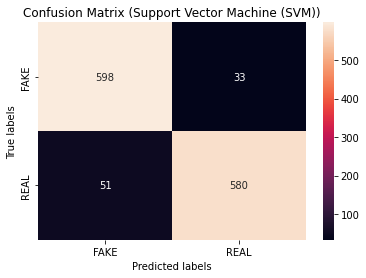

In [ ]:
#Evaluate to training data set
trainsvm = modelsvm.score(X_train,Y_train)
print('\nSupport Vector Machine (SVM) Training Data = {:.2f}%'.format(np.mean(trainsvm*100)))

#Evaluate to test data set
#Model accuracy
acc2 = modelsvm.score(X_test,Y_test)
print('\nSupport Vector Machine (SVM) Test Data = {:.2f}%'.format(np.mean(acc2*100)))

#F1-score
y_pred2 = modelsvm.predict(X_test)
print ('\nSupport Vector Machine (SVM) Classification Report:\n' + classification_report(Y_test, y_pred2))

#Confusion matrix
ax2= plt.subplot()
matrix2 = confusion_matrix(Y_test, y_pred2)
sns.heatmap(matrix2, annot=True, fmt="d")

#Visualize the confusion matrix
ax2.set_xlabel('Predicted labels');ax2.set_ylabel('True labels'); 
ax2.set_title('Confusion Matrix (Support Vector Machine (SVM))'); 
ax2.xaxis.set_ticklabels(['FAKE', 'REAL']); ax2.yaxis.set_ticklabels(['FAKE', 'REAL']);

**K-Nearest Neighbour (KNN)**


K-Nearest Neighbour (KNN) Training Data = 96.55%

K-Nearest Neighbour (KNN) Test Data = 86.21%

K-Nearest Neighbour (KNN) Classification Report:
              precision    recall  f1-score   support

        FAKE       0.86      0.87      0.86       631
        REAL       0.87      0.86      0.86       631

    accuracy                           0.86      1262
   macro avg       0.86      0.86      0.86      1262
weighted avg       0.86      0.86      0.86      1262



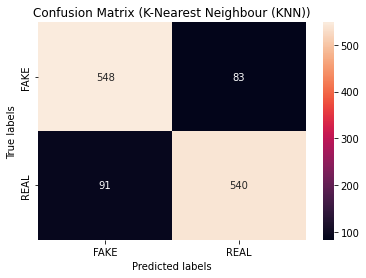

In [ ]:
#Evaluate to training data set
trainknn = modelknn.score(X_train,Y_train)
print('\nK-Nearest Neighbour (KNN) Training Data = {:.2f}%'.format(np.mean(trainknn*100)))

#Evaluate to test data set
#Model accuracy
acc3 = modelknn.score(X_test,Y_test)
print('\nK-Nearest Neighbour (KNN) Test Data = {:.2f}%'.format(np.mean(acc3*100)))

#F1-score
y_pred3 = modelknn.predict(X_test)
print ('\nK-Nearest Neighbour (KNN) Classification Report:\n' + classification_report(Y_test, y_pred3))

#Confusion matrix
ax3= plt.subplot()
matrix3 = confusion_matrix(Y_test, y_pred3)
sns.heatmap(matrix3, annot=True, fmt="d")

#Visualize the confusion matrix
ax3.set_xlabel('Predicted labels');ax3.set_ylabel('True labels'); 
ax3.set_title('Confusion Matrix (K-Nearest Neighbour (KNN))'); 
ax3.xaxis.set_ticklabels(['FAKE', 'REAL']); ax3.yaxis.set_ticklabels(['FAKE', 'REAL']);

**Comparing and Visualizing the Accuracy of 3 Models**

LR : 91.60%
SVM : 93.34%
KNN : 86.21%


<BarContainer object of 3 artists>

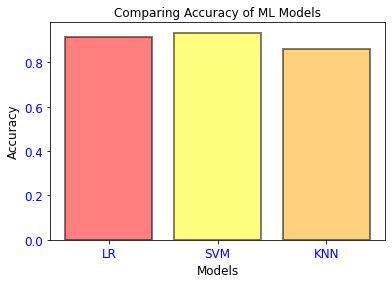

In [ ]:
#Define label
labels={'LR':acc1,'SVM':acc2,'KNN':acc3}
for model, accuracy in labels.items():
    print(str(model)+' : '+str('%.2f'%(accuracy*100) +'%'))

#Visualize bar chart
plt.figure(figsize=(6,4))
plt.title('Comparing Accuracy of ML Models',fontsize=12)
colors=['red','yellow','orange']
plt.xticks(fontsize=12,color='blue')
plt.yticks(fontsize=12,color='blue')
plt.ylabel('Accuracy',fontsize=12)
plt.xlabel('Models',fontsize=12)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5)

# **Parameter Tuning**

**Using K-Fold Cross Validation**

A statistical method for evaluating and comparing predictive models that divide the original sample into two segments: one for learning or training the model, and another for evaluating it. 

In [ ]:
#Using K-Fold Cross Validation
from sklearn.model_selection import cross_val_score

#Define model
lr = LogisticRegression()
svm = SGDClassifier()
knn = KNeighborsClassifier(n_neighbors=2)

#Flatten y array using ravel() to avoid warning (optional)
cv_results_lr=cross_val_score(lr,X,y.values.ravel(),cv=15)
cv_results_svm=cross_val_score(svm,X,y.values.ravel(),cv=10)
cv_results_knn=cross_val_score(knn,X,y.values.ravel(),cv=10)

#Display the result
print('\nCross validation result for Logistic Regression (LR) is {:.2f}%'.format(np.mean(cv_results_lr)*100))
print('\nCross validation result for Support Vector Machine (SVM) is {:.2f}%'.format(np.mean(cv_results_svm)*100))
print('\nCross validation result for K-Nearest Neighbour (KNN) is {:.2f}%'.format(np.mean(cv_results_knn*100)))


Cross validation result for Logistic Regression (LR) is 91.98%

Cross validation result for Support Vector Machine (SVM) is 94.32%

Cross validation result for K-Nearest Neighbour (KNN) is 87.61%


**Cross-validation classification report**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

# Nested CV with parameter optimization (LR)
nested_score = cross_val_score(lr,X,y.values.ravel(),cv=15, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 
print('\nCross validation accuracy result for Logistic Regression (LR) is {:.2f}%'.format(np.mean(nested_score)*100))

              precision    recall  f1-score   support

        FAKE       0.89      0.95      0.92      3152
        REAL       0.95      0.89      0.92      3154

    accuracy                           0.92      6306
   macro avg       0.92      0.92      0.92      6306
weighted avg       0.92      0.92      0.92      6306


Cross validation accuracy result for Logistic Regression (LR) is 91.98%


In [ ]:
# Nested CV with parameter optimization (SVM)
nested_score = cross_val_score(svm,X,y.values.ravel(),cv=15, scoring=make_scorer(classification_report_with_accuracy_score))
print(classification_report(originalclass, predictedclass)) 
print('\nCross validation accuracy result for Support Vector Machine (SVM) is {:.2f}%'.format(np.mean(nested_score)*100))

              precision    recall  f1-score   support

        FAKE       0.91      0.95      0.93      6304
        REAL       0.95      0.91      0.93      6308

    accuracy                           0.93     12612
   macro avg       0.93      0.93      0.93     12612
weighted avg       0.93      0.93      0.93     12612


Cross validation accuracy result for Support Vector Machine (SVM) is 94.40%


In [ ]:
# Nested CV with parameter optimization (KNN)
nested_score = cross_val_score(knn,X,y.values.ravel(),cv=13, scoring=make_scorer(classification_report_with_accuracy_score))
print(classification_report(originalclass, predictedclass)) 
print('\nCross validation accuracy result for K-Nearest Neighbour (KNN) is {:.2f}%'.format(np.mean(nested_score)*100))

              precision    recall  f1-score   support

        FAKE       0.90      0.93      0.92      9456
        REAL       0.93      0.90      0.91      9462

    accuracy                           0.91     18918
   macro avg       0.91      0.91      0.91     18918
weighted avg       0.91      0.91      0.91     18918


Cross validation accuracy result for K-Nearest Neighbour (KNN) is 87.93%


**Using GridSearchCV**

To determine the best values for a model's hyperparameters

In [ ]:
#Import required libary
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

#Define cross-validation value
cvgs = RepeatedStratifiedKFold(n_splits=13, n_repeats=3, random_state=1)

**Logistic Regression (LR)**

In [ ]:
#Define parameter
paramslr = {
    "solver" : ['newton-cg', 'lbfgs', 'liblinear'],
    "penalty" : ['l2'],
    "C" : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
}

#Define model LR
lrgs = LogisticRegression(max_iter=1000)

#Define search
searchgslr = GridSearchCV(lrgs, paramslr, scoring='accuracy', n_jobs=-1, cv=cvgs, error_score='raise')

#Execute search
resultgslr = searchgslr.fit(X, y)

#Summarize result
print('Best Score: {:.2f}%'.format(np.mean(resultgslr.best_score_*100)))
print('Best Hyperparameters: %s' % resultgslr.best_params_)

#Evaluate to test data
final_lr = resultgslr.best_estimator_
print(final_lr)

scorelr = final_lr.score(X_test,Y_test)
print('\nAccuracy Score : {:.2f}%'.format(np.mean(scorelr*100)))

resultgslr_predictions = final_lr.predict(X_test)
print('\nClassification report:\n' + classification_report(Y_test, resultgslr_predictions))

Best Score: 94.23%
Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=100, max_iter=1000, solver='newton-cg')

Accuracy Score : 100.00%

Classification report:
              precision    recall  f1-score   support

        FAKE       1.00      1.00      1.00       631
        REAL       1.00      1.00      1.00       631

    accuracy                           1.00      1262
   macro avg       1.00      1.00      1.00      1262
weighted avg       1.00      1.00      1.00      1262



**Support Vector Machine (SVM)**

In [ ]:
#Define parameter
paramssvm = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

#Define model SVM
svmgs = SGDClassifier(max_iter=1000)

#Define search
searchgssvm = GridSearchCV(svmgs, paramssvm, scoring='accuracy', n_jobs=-1, cv=cvgs)

#Execute search
resultgssvm = searchgssvm.fit(X, y)

#Summarize result
print('Best Score: {:.2f}%'.format(np.mean(resultgssvm.best_score_*100)))
print('Best Hyperparameters: %s' % resultgssvm.best_params_)

#Evaluate to test data
final_svm = resultgssvm.best_estimator_
print(final_svm)

scoresvm = final_svm.score(X_test,Y_test)
print('\nAccuracy Score : {:.2f}%'.format(np.mean(scoresvm*100)))

resultgssvm_predictions = final_svm.predict(X_test)
print('\nClassification report:\n' + classification_report(Y_test, resultgssvm_predictions))

Best Score: 94.50%
Best Hyperparameters: {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}
SGDClassifier()

Accuracy Score : 99.76%

Classification report:
              precision    recall  f1-score   support

        FAKE       1.00      1.00      1.00       631
        REAL       1.00      1.00      1.00       631

    accuracy                           1.00      1262
   macro avg       1.00      1.00      1.00      1262
weighted avg       1.00      1.00      1.00      1262



**K-Nearest Neighbour (KNN)**

In [ ]:
#Define parameter
k_range = list(range(1,10))
weight_options = ["uniform", "distance"]
paramsknn = dict(n_neighbors = k_range, weights = weight_options)

#Define search
searchgsknn = GridSearchCV(knn, paramsknn, scoring='accuracy', n_jobs=-1, cv=cvgs)

#Execute search
resultgsknn = searchgsknn.fit(X,y)

#Summarize result
print('Best Score: {:.2f}%'.format(np.mean(resultgsknn.best_score_*100)))
print('Best Hyperparameters: %s' % resultgsknn.best_params_)

#Evaluate to test data
final_knn = resultgsknn.best_estimator_
print(final_knn)

scoreknn = final_knn.score(X_test,Y_test)
print('\nAccuracy Score : {:.2f}%'.format(np.mean(scoreknn*100)))

resultgsknn_predictions = final_knn.predict(X_test)
print('\nClassification report:\n' + classification_report(Y_test, resultgsknn_predictions))

Best Score: 87.75%
Best Hyperparameters: {'n_neighbors': 2, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=2)

Accuracy Score : 96.75%

Classification report:
              precision    recall  f1-score   support

        FAKE       0.94      1.00      0.97       631
        REAL       1.00      0.94      0.97       631

    accuracy                           0.97      1262
   macro avg       0.97      0.97      0.97      1262
weighted avg       0.97      0.97      0.97      1262



**Paired T-Test**

In [ ]:
#T-Test for LR & SVM
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=lrgs, estimator2=svmgs, X=X, y=y, scoring='accuracy', random_seed=1)

# summarize
print('P-value for LR & SVM: %.3f, t-Statistic: %.3f' % (p, t))

# interpret the result
if p <= 0.05:
	print('Difference between mean performance is probably real') #significant
else:
	print('Algorithms probably have the same performance')
 

P-value for LR & SVM: 0.000, t-Statistic: -20.291
Difference between mean performance is probably real


In [ ]:
#T-Test for SVM & KNN
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=svmgs, estimator2=knn, X=X, y=y, scoring='accuracy', random_seed=1)

# summarize
print('P-value for SVM & KNN: %.3f, t-Statistic: %.3f' % (p, t))

# interpret the result
if p <= 0.05:
	print('Difference between mean performance is probably real') #significant
else:
	print('Algorithms probably have the same performance')

P-value for SVM & KNN: 0.000, t-Statistic: 15.646
Difference between mean performance is probably real


In [ ]:
#T-Test for LR & KNN
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=knn, estimator2=lrgs, X=X, y=y, scoring='accuracy', random_seed=1)

# summarize
print('P-value LR & KNN: %.3f, t-Statistic: %.3f' % (p, t))

# interpret the result
if p <= 0.05:
	print('Difference between mean performance is probably real') #significant
else:
	print('Algorithms probably have the same performance')

P-value LR & KNN: 0.000, t-Statistic: -8.579
Difference between mean performance is probably real
